# Version of tensorflow

In [38]:
import tensorflow as tf
import numpy as np
import pandas as pd
tf.__version__

'1.12.0'

# Loading dataset

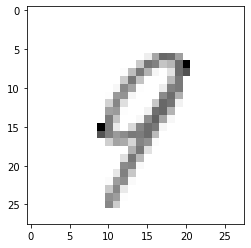

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [39]:
mnist = tf.keras.datasets.mnist
import matplotlib.pyplot as plt

plt.imshow(x_train[22], cmap = plt.cm.binary) # To get the black and white image
plt.show()
print(x_train[22])

# Training the model

In [40]:
(x_train, y_train), (x_test, y_test) = mnist.load_data() # Train test split

x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

model = tf.keras.models.Sequential() # Creating a sequential model
model.add(tf.keras.layers.Flatten(input_shape = (28,28))) # Flattening the input layer
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu)) # Adding the first hidden layer
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu)) # Adding the second hidden layer
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax)) # Adding the activation function for the output layer

#Can use stochastic gradient descent as well for optimizer, Can use binary for loss in case of cats and dogs problem
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])
model.fit(x_train, y_train, epochs=3)

Epoch 1/3
60000/60000 [==============================] - 8s 139us/step - loss: 0.2636 - acc: 0.9232
Epoch 2/3
60000/60000 [==============================] - 8s 132us/step - loss: 0.1067 - acc: 0.9671
Epoch 3/3
60000/60000 [==============================] - 8s 131us/step - loss: 0.0736 - acc: 0.9766


# Checking the loss and accuracy

In [41]:
val_loss, val_acc = model.evaluate(x_test, y_test)
print(val_loss, val_acc)

10000/10000 [==============================] - 1s 69us/step
0.09470927569791675 0.9712


In [42]:
model.save('hnc.model') # To save the model

In [43]:
model_new = tf.keras.models.load_model('hnc.model') # To load the model

In [44]:
predictions = model_new.predict([x_test]) #Predicting the test dataset

In [45]:
print(np.argmax(predictions[37])) # Displaying the prediction

1


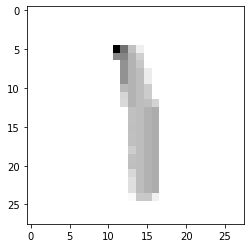

In [47]:
plt.imshow(x_test[37], cmap = plt.cm.binary) # The actual value
plt.show()